In [93]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Auto generar data

In [94]:
import pandas as pd
import numpy as np

# Create a sample dataset
np.random.seed(42)

# Example features: age, income, and number of children
n_samples = 1000
age = np.random.randint(20, 80, size=n_samples)
income = np.random.randint(20000, 100000, size=n_samples)
children = np.random.randint(0, 5, size=n_samples)

# Generating categorical data for occupation
occupations = ['Engineer', 'Doctor', 'Teacher', 'Artist', 'Manager']
occupation = np.random.choice(occupations, size=n_samples)

# Target variable: purchase amount
purchase_amount = 5000 + 100 * age + 10 * income - 200 * children + np.random.normal(0, 5000, size=n_samples)

# Create DataFrame
data = pd.DataFrame({'Age': age, 'Income': income, 'Children': children, 'Occupation': occupation, 'Purchase_Amount': purchase_amount})

# Add some missing values for demonstration
# Randomly select 5% of values in 'Income' column and set them to NaN
missing_indices = np.random.choice(data.index, size=int(len(data) * 0.05), replace=False)
data.loc[missing_indices, 'Income'] = np.nan

# Save the dataset to a CSV file for later use
data.to_csv('sample_dataset.csv', index=False)

# Leer datos de un CSV

In [95]:
data = pd.read_csv('sample_dataset.csv')
data.head(10)

,Age,Income,Children,Occupation,Purchase_Amount
0,58,56187.0,4,Artist,570102.522769
1,71,27239.0,3,Doctor,278699.154265
2,48,34489.0,2,Engineer,361776.844855
3,34,78017.0,4,Manager,785247.237815
4,62,NaN,1,Teacher,821028.091719
5,27,63125.0,4,Artist,638815.468676
6,40,69922.0,0,Doctor,706596.132634
7,58,52049.0,2,Engineer,542391.978213
8,77,57131.0,1,Teacher,586186.830172
9,38,62944.0,3,Doctor,636908.288232


In [96]:
# Separar columnas numericas y categoricas
numerical_cols = data.select_dtypes(include=['number']).columns
categorical_cols = data.select_dtypes(include=['object']).columns

In [97]:
numerical_cols

Index(['Age', 'Income', 'Children', 'Purchase_Amount'], dtype='object')

In [98]:
categorical_cols

Index(['Occupation'], dtype='object')

# Revisar el dataframe y encontrar los valores nulos

In [99]:
data.isnull().sum()

Age                 0
Income             50
Children            0
Occupation          0
Purchase_Amount     0
dtype: int64

In [100]:
# Exercise 4: Impute missing values for numerical columns
numerical_imputer = SimpleImputer(strategy='mean')

# Feature Scaling

In [101]:
scaler = StandardScaler()

In [102]:
minmax_scaler = MinMaxScaler()

# One Hot Encoding

In [103]:
onehot_encoder = OneHotEncoder(handle_unknown='ignore')

# Generar un pipeline de preprocesamiento

In [104]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', numerical_imputer),
            ('scaler', scaler),
            ('minmax_scaler', minmax_scaler)
        ]), numerical_cols),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', onehot_encoder)
        ]), categorical_cols)
    ], remainder='passthrough')

In [105]:
processed_data = preprocessor.fit_transform(data)
processed_data

array([[0.6440678 , 0.45249843, 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.86440678, 0.08996869, 0.75      , ..., 0.        , 0.        ,
        0.        ],
       [0.47457627, 0.18076393, 0.5       , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.81355932, 0.36782718, 0.75      , ..., 0.        , 0.        ,
        0.        ],
       [0.66101695, 0.22195366, 0.25      , ..., 0.        , 1.        ,
        0.        ],
       [0.52542373, 0.56588604, 1.        , ..., 0.        , 1.        ,
        0.        ]])

# Guardar los datos en un nuevo CSV

In [106]:
# Define a function to get one-hot encoded feature names
def get_onehot_feature_names(encoder, categorical_cols):
    categories = encoder.categories_
    feature_names = []
    for i, col in enumerate(categorical_cols):
        for category in categories[i]:
            feature_names.append(f"{col}_{category}")
    return feature_names

In [107]:
# Get column names for processed data
numerical_feature_names = numerical_cols.tolist()
categorical_feature_names = get_onehot_feature_names(preprocessor.named_transformers_['cat']['onehot'], categorical_cols)
processed_feature_names = numerical_feature_names + categorical_feature_names

In [108]:
processed_data_df = pd.DataFrame(processed_data, columns=processed_feature_names)
processed_data_df.to_csv("data_processed.csv")

In [109]:
data.head(10)

,Age,Income,Children,Occupation,Purchase_Amount
0,58,56187.0,4,Artist,570102.522769
1,71,27239.0,3,Doctor,278699.154265
2,48,34489.0,2,Engineer,361776.844855
3,34,78017.0,4,Manager,785247.237815
4,62,NaN,1,Teacher,821028.091719
5,27,63125.0,4,Artist,638815.468676
6,40,69922.0,0,Doctor,706596.132634
7,58,52049.0,2,Engineer,542391.978213
8,77,57131.0,1,Teacher,586186.830172
9,38,62944.0,3,Doctor,636908.288232


In [110]:
processed_data_df.head(10)

,Age,Income,Children,Purchase_Amount,Occupation_Artist,Occupation_Doctor,Occupation_Engineer,Occupation_Manager,Occupation_Teacher
0,0.644068,0.452498,1.00,0.453629,1.0,0.0,0.0,0.0,0.0
1,0.864407,0.089969,0.75,0.092081,0.0,1.0,0.0,0.0,0.0
2,0.474576,0.180764,0.50,0.195157,0.0,0.0,1.0,0.0,0.0
3,0.237288,0.725886,1.00,0.720561,0.0,0.0,0.0,1.0,0.0
4,0.711864,0.495927,0.25,0.764955,0.0,0.0,0.0,0.0,1.0
5,0.118644,0.539386,1.00,0.538882,1.0,0.0,0.0,0.0,0.0
6,0.338983,0.624508,0.00,0.622978,0.0,1.0,0.0,0.0,0.0
7,0.644068,0.400676,0.50,0.419248,0.0,0.0,1.0,0.0,0.0
8,0.966102,0.464321,0.25,0.473585,0.0,0.0,0.0,0.0,1.0
9,0.305085,0.537120,0.75,0.536515,0.0,1.0,0.0,0.0,0.0


In [111]:
processed_data_df = processed_data_df.drop(["Purchase_Amount"], axis=1)
processed_data_df.head(10)

,Age,Income,Children,Occupation_Artist,Occupation_Doctor,Occupation_Engineer,Occupation_Manager,Occupation_Teacher
0,0.644068,0.452498,1.00,1.0,0.0,0.0,0.0,0.0
1,0.864407,0.089969,0.75,0.0,1.0,0.0,0.0,0.0
2,0.474576,0.180764,0.50,0.0,0.0,1.0,0.0,0.0
3,0.237288,0.725886,1.00,0.0,0.0,0.0,1.0,0.0
4,0.711864,0.495927,0.25,0.0,0.0,0.0,0.0,1.0
5,0.118644,0.539386,1.00,1.0,0.0,0.0,0.0,0.0
6,0.338983,0.624508,0.00,0.0,1.0,0.0,0.0,0.0
7,0.644068,0.400676,0.50,0.0,0.0,1.0,0.0,0.0
8,0.966102,0.464321,0.25,0.0,0.0,0.0,0.0,1.0
9,0.305085,0.537120,0.75,0.0,1.0,0.0,0.0,0.0


# Otras Funciones Útiles de Pandas

## Hacer una copia de mi DataFrame

In [112]:
df = data.copy()
df.shape

(1000, 5)

## Concatenar dos dataframes (en este caso estamos duplicando los datos)

In [113]:
df = pd.concat([df, df])
df.head(5)

,Age,Income,Children,Occupation,Purchase_Amount
0,58,56187.0,4,Artist,570102.522769
1,71,27239.0,3,Doctor,278699.154265
2,48,34489.0,2,Engineer,361776.844855
3,34,78017.0,4,Manager,785247.237815
4,62,NaN,1,Teacher,821028.091719


## Eliminar duplicados con Pandas

In [114]:
# Conteo de datos duplicados
df.shape

(2000, 5)

In [115]:
df = df.drop_duplicates()
df.shape

(1000, 5)

## Eliminar valores nulos con pandas

In [116]:
# Primero encuento el conteo de valores nulos
df.isnull().sum()

Age                 0
Income             50
Children            0
Occupation          0
Purchase_Amount     0
dtype: int64

In [117]:
# Posteriormenete aplico la función dropna
df.dropna(inplace=True)
df.isnull().sum()

<ipython-input-117-fe2867e35d83>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


Age                0
Income             0
Children           0
Occupation         0
Purchase_Amount    0
dtype: int64

In [123]:
nulos2 = data.copy()
nulos2.isnull().sum()

Age                 0
Income             50
Children            0
Occupation          0
Purchase_Amount     0
dtype: int64

In [124]:
# Rellena los valores nulos con el número 0
nulos2.fillna(0, inplace=True)
nulos2.isnull().sum()

Age                0
Income             0
Children           0
Occupation         0
Purchase_Amount    0
dtype: int64

## Generar Gráficos con Pandas basado en mi dataset

<Axes: >

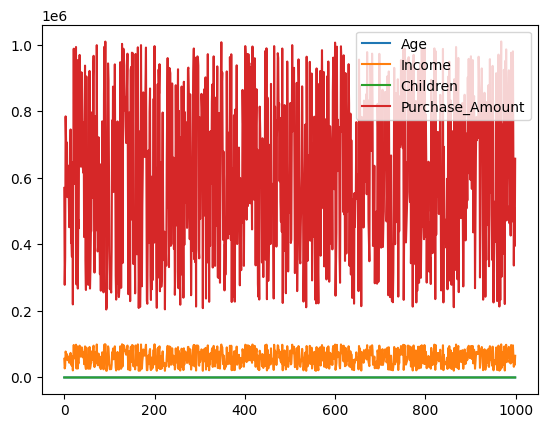

In [118]:
df.plot()

<Axes: >

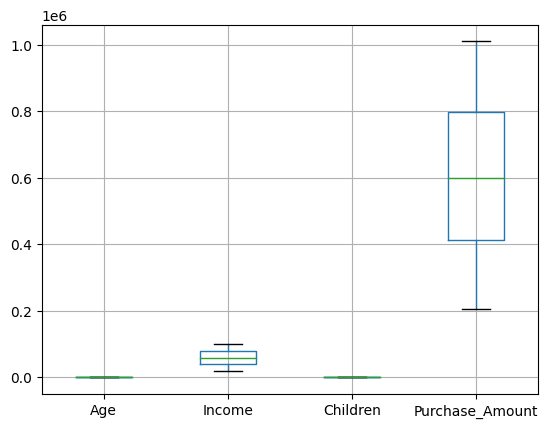

In [119]:
df.boxplot()

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Income'}>],
       [<Axes: title={'center': 'Children'}>,
        <Axes: title={'center': 'Purchase_Amount'}>]], dtype=object)

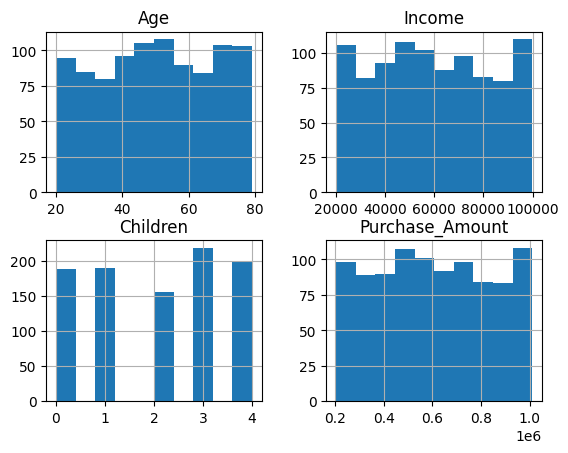

In [120]:
df_numerical = df.select_dtypes(include=['number'])
df_numerical.hist()

In [121]:
df_numerical.corr()

,Age,Income,Children,Purchase_Amount
Age,1.000000,-0.056397,-0.022844,-0.049254
Income,-0.056397,1.000000,0.033853,0.999741
Children,-0.022844,0.033853,1.000000,0.031507
Purchase_Amount,-0.049254,0.999741,0.031507,1.000000


*   Un valor de 1 indica una correlación positiva perfecta. (Si uno aumenta el otro también)
*   Un valor de 0 indica que no hay correlación lineal. (No están relacionados)
*   Un valor de -1 indica una correlación negativa perfecta. (Si uno aumenta el otro disminuye)